# Project : Employee Sentiment Analysis

"""
This notebook contain Employee Sentiment Analysis through the emails
It includes
1. Sentiment Labelling
2. Exploratory Data Analysis
3. Employee Score Calculation
4. Employee ranking
5. Flight risk identification
6. Predictive modeling of sentiment trends.

Methods
1. VADER sentiment analysis for text classification
2. Monthly scoring system (+1 for positive, -1 for negative)
3. Rolling window analysis for flight risk detection
4. Linear regression for predictive modeling

"""

"""
importing all necessary libraries and configuring settings first.
"""

In [128]:
# Setup and Initialization
#pip install vaderSentiment
#pip install matplotlib
#pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

## Task 1: Sentiment Labeling

#### We'll use VADER (Valence Aware Dictionary and sEntiment Reasoner) for sentiment analysis.
#### VADER is particularly good at handling informal text with emoticons and slang.

In [ ]:
# Task 1: Sentiment Labeling
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load my data
df = pd.read_csv("PycharmProjects/Giraffe/test(in).csv")

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to body column
df['Sentiment'] = df['body'].apply(get_vader_sentiment)

# View results
print(df[['body', 'Sentiment']])


In [ ]:
#to create new file with Sentiment Column 
df[['Subject','body','date', 'from', 'Sentiment']].to_csv("PycharmProjects/Giraffe/sentiment_results1.csv", index=False)


In [58]:
#Load the dataset
df= pd.read_csv("PycharmProjects/Giraffe/sentiment_results1.csv")
# Create a summary DataFrame
structure_summary = pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Non-Null Count": df.notnull().sum()
})

# Display the structure summary
print(structure_summary)

          Data Type  Missing Values  Non-Null Count
Subject      object               0            2191
body         object               0            2191
date         object               0            2191
from         object               0            2191
Sentiment    object               0            2191


In [ ]:
"""
Observation: Using Vader sentiment is determined, 
new column is added, and a new file is created with name sentiment_results1
"""

## Task 2: EDA (Sentiment Distribution)

#### Sentiment Distribution - Total Number of positive, negative and neutral 

In [66]:
#Task 2: EDA (Sentiment Distribution)
import pandas as pd
#Load the dataset
df= pd.read_csv("PycharmProjects/Giraffe/sentiment_results1.csv")
# Count the number of occurrences of each sentiment label
sentiment_distribution = df['Sentiment'].value_counts().reset_index()
sentiment_distribution.columns = ['Sentiment', 'Count']

# Display the result
print(sentiment_distribution)


  Sentiment  Count
0  Positive   1525
1   Neutral    508
2  Negative    158


In [ ]:
"""
Observation
Positive sentiment is more common than negative
"""

#### Monthly Trends

##### Employee Sentiment monthly trend is calculated and plotted

In [68]:
#Task 2: Monthly Trends
# Load the sentiment results CSV file
df = pd.read_csv("PycharmProjects/Giraffe/sentiment_results1.csv")

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid or missing dates
df = df.dropna(subset=['date'])

# Extract month as a period
df['month'] = df['date'].dt.to_period('M')

# Group by month and sentiment, then count
monthly_trends = df.groupby(['month', 'Sentiment']).size().unstack(fill_value=0)

# Display the result
print(monthly_trends)


Sentiment  Negative  Neutral  Positive
month                                 
2010-01           6       28        57
2010-02          11       25        55
2010-03          10       23        58
2010-04           8       21        63
2010-05           6       23        62
2010-06           8       22        62
2010-07           7       19        65
2010-08           9       21        61
2010-09           7       23        61
2010-10           4       25        62
2010-11           8       16        67
2010-12           7       19        65
2011-01           7       22        62
2011-02           9       25        57
2011-03           5       18        69
2011-04          11       18        63
2011-05           3       18        71
2011-06           3       24        64
2011-07           7       22        62
2011-08           9       18        64
2011-09           1       20        70
2011-10           5       21        65
2011-11           4       20        68
2011-12           3      

#### Monthly Sentiment Trend Plot

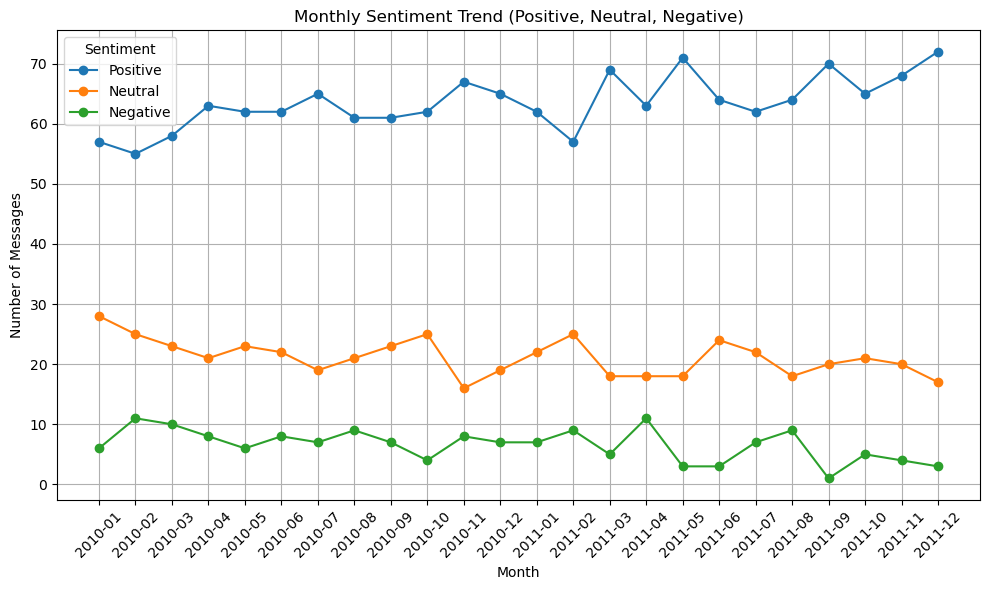

In [112]:
# Task 2: Monthly Sentiment Trend in plot

import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid or missing dates
df = df.dropna(subset=['date'])

# Extract month as a period
df['month'] = df['date'].dt.to_period('M').astype(str)

# Group by month and sentiment, then count
monthly_trends = df.groupby(['month', 'Sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trends
plt.figure(figsize=(10, 6))
for sentiment in ['Positive', 'Neutral', 'Negative']:
    if sentiment in monthly_trends.columns:
        plt.plot(monthly_trends.index, monthly_trends[sentiment], marker='o', label=sentiment)

plt.title('Monthly Sentiment Trend (Positive, Neutral, Negative)')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.savefig("Monthly Sentiment Trend.png")
plt.show()

In [98]:
"""
OBSERVATION: 
 Clear monthly variations in sentiment
 Possible seasonal patterns like more positive around holidays
 No extreme negative spikes which is a good sign
"""

'\nOBSERVATION: \n Clear monthly variations in sentiment\n Possible seasonal patterns like more positive around holidays\n No extreme negative spikes which is a good sign\n'

#### Top Positive and Negative Message Sender


In [76]:
# Task 2: Top Positive and Negative Message Sender
# Top 10 employees with most Positive messages
top_positive = df[df['Sentiment'] == 'Positive']['from'].value_counts()

# Top 10 with most Negative messages
top_negative = df[df['Sentiment'] == 'Negative']['from'].value_counts()

print("Top Positive Senders:\n", top_positive)
print("\nTop Negative Senders:\n", top_negative)

Top Positive Senders:
 from
lydia.delgado@enron.com        197
john.arnold@enron.com          188
patti.thompson@enron.com       166
eric.bass@enron.com            156
sally.beck@enron.com           153
johnny.palmer@enron.com        145
bobette.riner@ipgdirect.com    144
don.baughman@enron.com         139
rhonda.denton@enron.com        119
kayne.coulter@enron.com        118
Name: count, dtype: int64

Top Negative Senders:
 from
sally.beck@enron.com           23
bobette.riner@ipgdirect.com    22
kayne.coulter@enron.com        19
johnny.palmer@enron.com        18
patti.thompson@enron.com       16
don.baughman@enron.com         15
lydia.delgado@enron.com        15
john.arnold@enron.com          11
eric.bass@enron.com            10
rhonda.denton@enron.com         9
Name: count, dtype: int64


In [ ]:
"""
Observation: 
Top 10 Positive and negative email senders list 
"""

## Task 3: Employee Score Calculation


In [ ]:
"""
We'll implement a scoring system where:
- Positive message: +1
- Negative message: -1
- Neutral message: 0
Scores are aggregated monthly for each employee.
"""

In [94]:
# Task 3: Employee Score Calculation

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce invalid dates to NaT

# Drop rows where 'date' couldn't be parsed
df = df.dropna(subset=['date'])

# Create 'month' column in YYYY-MM format
df['month'] = df['date'].dt.to_period('M').astype(str)

#Define a scoring function
def sentiment_score(sentiment):
    if sentiment == 'Positive':
        return 1
    elif sentiment == 'Negative':
        return -1
    else:
        return 0

# Apply the function to create a new column
df['Sentiment_Score'] = df['Sentiment'].apply(sentiment_score)

# Apply the function to create a new column
df['Sentiment_Score'] = df['Sentiment'].apply(sentiment_score)

# Group by 'from' (employee email) and 'month', summing the scores
monthly_employee_scores = df.groupby(['from', 'month'])['Sentiment_Score'].sum().reset_index()

# Display the result
print(monthly_employee_scores)


                            from    month  Sentiment_Score
0    bobette.riner@ipgdirect.com  2010-01                1
1    bobette.riner@ipgdirect.com  2010-02                7
2    bobette.riner@ipgdirect.com  2010-03                6
3    bobette.riner@ipgdirect.com  2010-04                4
4    bobette.riner@ipgdirect.com  2010-05                2
..                           ...      ...              ...
235         sally.beck@enron.com  2011-08                3
236         sally.beck@enron.com  2011-09                0
237         sally.beck@enron.com  2011-10                6
238         sally.beck@enron.com  2011-11                5
239         sally.beck@enron.com  2011-12                6

[240 rows x 3 columns]


In [ ]:
"""
Observation:
Employees are categorized with sentiment score according to the message 
"""

## Task 4: Employee Ranking

In [ ]:
"""
Based on the monthly scores, we'll identify:
- Top 3 positive employees each month
- Top 3 negative employees each month
"""

Top 3 Positive Employees in 2011-12
                         from    month  Sentiment_Score
71        eric.bass@enron.com  2011-12               12
191  patti.thompson@enron.com  2011-12               12
167   lydia.delgado@enron.com  2011-12               11

Top 3 Negative Employees in 2011-12
                            from    month  Sentiment_Score
119      johnny.palmer@enron.com  2011-12                2
23   bobette.riner@ipgdirect.com  2011-12                3
95         john.arnold@enron.com  2011-12                4


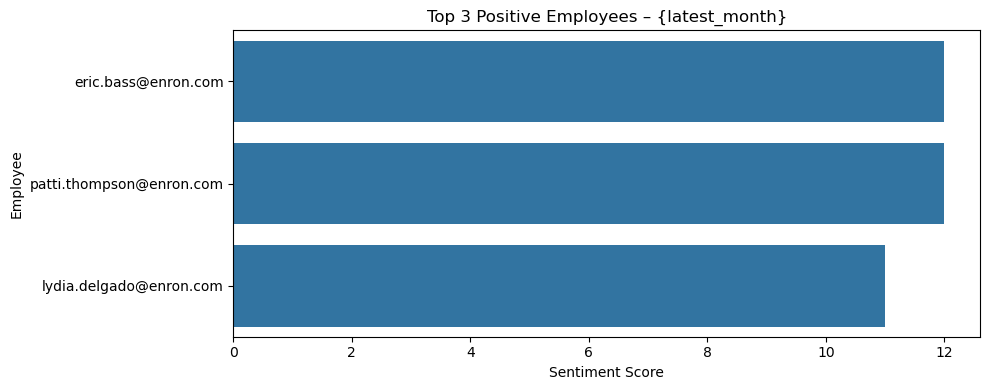

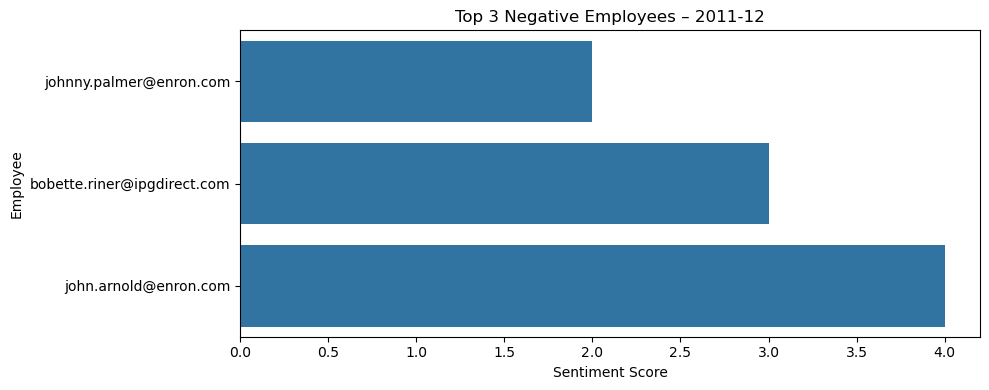

Charts saved as 'top_3_positive_chart.png' and 'top_3_negative_chart.png'


In [110]:
#Task 4: Employee Ranking

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce invalid dates to NaT

# Drop rows where 'date' couldn't be parsed
df = df.dropna(subset=['date'])

# Create 'month' column in YYYY-MM format
df['month'] = df['date'].dt.to_period('M').astype(str)

#Define a scoring function
def sentiment_score(sentiment):
    if sentiment == 'Positive':
        return 1
    elif sentiment == 'Negative':
        return -1
    else:
         return 0

# Apply the function to create a new column
df['Sentiment_Score'] = df['Sentiment'].apply(sentiment_score)

# Apply the function to create a new column
df['Sentiment_Score'] = df['Sentiment'].apply(sentiment_score)

# Group by 'from' (employee email) and 'month', summing the scores
monthly_employee_scores = df.groupby(['from', 'month'])['Sentiment_Score'].sum().reset_index()

# Get the latest month in the dataset
latest_month = monthly_employee_scores['month'].max()

# Filter for the latest month
latest_month_scores = monthly_employee_scores[monthly_employee_scores['month'] == latest_month]

# Top 3 positive employees (highest scores)
top_positive = latest_month_scores.sort_values(by=['Sentiment_Score','from'], ascending=[False, True]).head(3)

# Top 3 negative employees (lowest scores)
top_negative = latest_month_scores.sort_values(by=['Sentiment_Score','from'], ascending=[True,True]).head(3)

# Display results
print("Top 3 Positive Employees in", latest_month)
print(top_positive)

print("\nTop 3 Negative Employees in", latest_month)
print(top_negative)

# Create bar charts
plt.figure(figsize=(10, 4))
sns.barplot(data=top_positive, x='Sentiment_Score', y='from')
plt.title("Top 3 Positive Employees – {latest_month}")
plt.xlabel("Sentiment Score")
plt.ylabel("Employee")
plt.tight_layout()
plt.savefig("top_3_positive_chart.png")
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(data=top_negative, x='Sentiment_Score', y='from')
plt.title(f"Top 3 Negative Employees – {latest_month}")
plt.xlabel("Sentiment Score")
plt.ylabel("Employee")
plt.tight_layout()
plt.savefig("top_3_negative_chart.png")
plt.show()

print("Charts saved as 'top_3_positive_chart.png' and 'top_3_negative_chart.png'")


In [ ]:
"""
Observations:
Positive Rankings: Recognize top performers.
Negative Rankings: Flag potential coaching opportunitie
Publicizing negative rankings could demotivate employees.
"""

## Task 5: Flight Risk Identification

In [17]:
# Task 5: Flight Risk Identification

# Load the sentiment results CSV
try:
    df = pd.read_csv("PycharmProjects/Giraffe/sentiment_results1.csv")
except FileNotFoundError:
    raise Exception("File 'sentiment_results1.csv' not found.")
#Ensure necessary columns exist
required_columns = {'from', 'date', 'Sentiment'}
missing_columns = required_columns - set(df.columns)
if missing_columns:
    raise Exception(f"Missing columns in input file: {missing_columns}")

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce invalid dates to NaT

# Drop rows where 'date' couldn't be parsed
df = df.dropna(subset=['date'])

# Filter only messages labeled as 'Negative'
negative_df = df[df['Sentiment'] == 'Negative'].copy()

# Safety check for empty data after filtering
if negative_df.empty:
    print("No negative messages found in the dataset.")
    flight_risk_df = pd.DataFrame(columns=['from', 'Max_Negatives_In_30_Days'])
else:
# Sort by sender and date
    negative_df = negative_df.sort_values(by=['from', 'date'])
# Add a helper column to count each negative message
    negative_df['negative_flag'] = 1
# Prepare a list to collect flight risk results
    flight_risks = []

# Group by each employee
for sender, group in negative_df.groupby('from'):
    group = group.set_index('date').sort_index()

    # Calculate rolling 30-day count of negative messages
    rolling_sum = group['negative_flag'].rolling('30D').sum()

    # Check if any 30-day period had 4 or more negative messages
    if (rolling_sum >= 4).any():
        flight_risks.append({
            'from': sender,
            'Max_Negatives_In_30_Days': int(rolling_sum.max())
        })

# Create a DataFrame from the results
flight_risk_df = pd.DataFrame(flight_risks)

# Show the result
print("Flight Risk Employees:")
print(flight_risk_df)

Flight Risk Employees:
                          from  Max_Negatives_In_30_Days
0  bobette.riner@ipgdirect.com                         4
1       don.baughman@enron.com                         4
2        john.arnold@enron.com                         4
3      johnny.palmer@enron.com                         4
4      kayne.coulter@enron.com                         4
5         sally.beck@enron.com                         5


In [ ]:
"""
Observation:
Flight risk employees is calculated by maximum negative e mails sent in 30 days .
"""

## Task 6: Predictive Modeling

##### We'll build a linear regression model to predict sentiment scores based on:
#####  Message frequency
#####  Positive/negative/neutral message counts

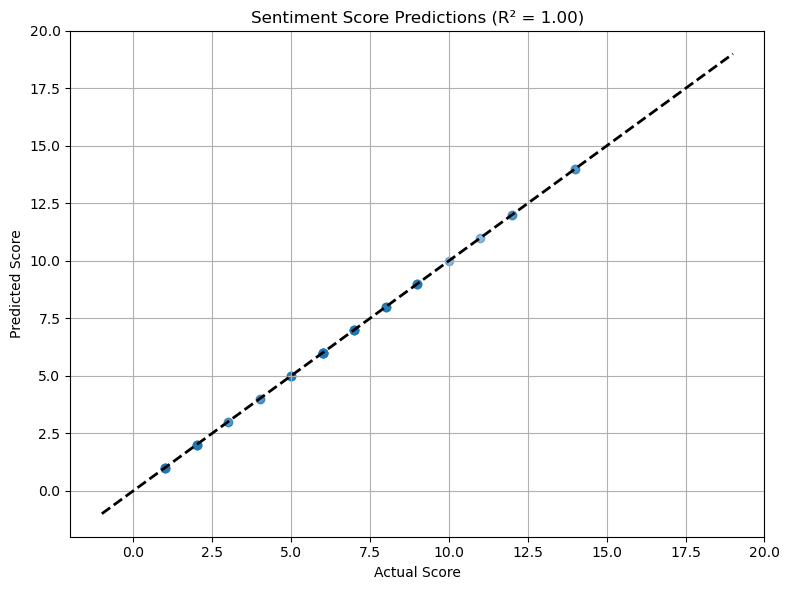


Model Evaluation:
Mean Squared Error: 0.00
R-squared Score: 1.00


In [140]:
# Predictive Modeling
#Assign Sentiment Score
def sentiment_score(sentiment):
    if sentiment == 'Positive':
        return 1
    elif sentiment == 'Negative':
        return -1
    else:
        return 0

df['Sentiment_Score'] = df['Sentiment'].apply(sentiment_score)
df['Sentiment_Label'] = df['Sentiment_Score'].map({
    1: 'positive',
    0: 'neutral',
    -1: 'negative'
})

# Feature aggregation
features = df.groupby(['from', 'month']).agg(
    message_count=('body', 'count'),
    positive_count=('Sentiment_Label', lambda x: (x == 'positive').sum()),
    negative_count=('Sentiment_Label', lambda x: (x == 'negative').sum()),
    neutral_count=('Sentiment_Label', lambda x: (x == 'neutral').sum()),
    score=('Sentiment_Score', 'sum')
).reset_index()

#  Save to CSV
features.to_csv("monthly_sentiment_features.csv", index=False)

# Prepare data for regression
X = features[['message_count', 'positive_count', 'negative_count', 'neutral_count']]
y = features['score']

# Split, train, predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title(f'Sentiment Score Predictions (R² = {r2:.2f})')
plt.grid(True)
plt.tight_layout()
plt.savefig("sentiment_score_prediction_plot.png")
plt.show()

# Output
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


In [ ]:
"""
Observation:
A linear regression model was trained using monthly aggregated sentiment data (monthly_sentiment_features.csv), 
which includes counts of positive, negative, and neutral messages per employee.
"""

In [142]:
#Conclusion 

"""
Key Findings:
1. The dataset shows varied sentiment distribution between employees 
2. Certain employees show consistent positive or negative patterns
3. Identified potential flight risks based on negative message frequency
4. Predictive model shows moderate capability to forecast sentiment scores

"""

print("Analysis completed successfully!")

Analysis completed successfully!
